<font color='red'>

# Titanic EDA and Classification Project  (TOP %5)
    
<font color='black'>

Content of The Titanic Exploratory Data Analysis
1. [Chapter-1 Data Load and Check](#1)
    * [1-Outlier Detection](#2)
    * [2-Joining Test and Train Data](#3)
    * [3-Feature Check](#4)
1. [Chapter-2 Data Analysis](#5)
    * [1-Feature Analysis](#6)
    * [2-Correlation Between Feature](#7)
1. [Chapter-3 Missing Value](#8)
    * [1-Find Missing Value](#9)
    * [2-Fill Missing Value](#10)
1. [Chapter-4 Data Engineering](#11)
    * [1-New Feature](#12)
    * [2-Drop Feature](#13)
    * [3-One Hot Encoding](#14)
1. [Chapter-5 Modeling](#16)
    * [1-Train-Test Split](#17)
    * [2-Classification Methods](#18)
    * [3-Ensemble Modeling](#19)
    * [4-Result](#20)


   
    
    
    
    



    
    
    

<a id='1'></a><br>
# Chapter:1 Data Load And Check

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_data = pd.read_csv("../input/titanic/train.csv")
test_data = pd.read_csv("../input/titanic/test.csv")


train_data.columns

In [ ]:
train_data.head()

In [ ]:
train_data.info()

 <a id='2'></a><br>
## 1-Outlier Detection


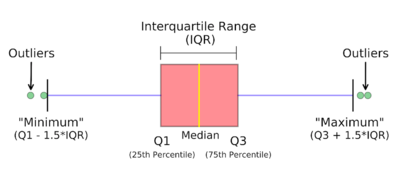

* Q1 = 1.Quartile 25%
* Q2 = 2.Quartile 50% (median)
* Q3 = 3.Quartile 75%
* IQR = Q3 - Q1
* Outlier data = (Q1 - 1.5 IQR ) U (Q3 + 1.5 IQR)



In [ ]:
train_data.describe()

In [ ]:
def outlier_detect(feature, data):
    outlier_index = []

    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        min_quartile = Q1 - 1.5*IQR
        max_quartile = Q3 + 1.5*IQR
        outlier_list = data[(data[each] < min_quartile) | (data[each] > max_quartile)].index
        outlier_index.extend(outlier_list)
        
    outlier_index = Counter(outlier_index)
    #If there are three or more outlier data features we must delete them. (n)
    outlier_data = list(i for i, n in outlier_index.items() if n > 3)
    return outlier_data

In [ ]:
outlier_data = outlier_detect(["Age","SibSp","Parch","Fare"], train_data)
train_data.loc[outlier_data]


In [ ]:
train_data = train_data.drop(outlier_data, axis=0).reset_index(drop=True)

<a id='3'></a><br>
## 2-Combining Train and Test Data


* Train_data and test_data are combined so that data is obtained. 


In [ ]:
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

<a id='4'></a><br>
## 3-Feature Analysis

Object
1. Name        : 
1. Sex         : male and female
1. Ticket      : ticket number
1. Cabin       : cabin category
1. Embarked    : port C, Q and S

Int64
1. PassengerId : unique id number
1. Survived    : 0 -> died ,1-> survived
1. Pclasss     : 1, 2 and 3 
1. SibSp       : number of siblings/spouse
1. Parch       : number of parent/children

Float64
1. Age         : age of passenger
1. Fare        : price of the ticket

### Survived

In [ ]:
sns.countplot('Survived',data=train_data )


In [ ]:
data.describe()

<a id='5'></a><br>
# Chapter:2 Data Analysis

* Feature Analysis
* Corelation Between Features



<a id='6'></a><br>
## 1- Feature Analysis

* Sex - Survived
* Pclass - Survived
* Embarked - Survived
* SibSp - Survived
* Parch - Survived
* Age - Survived
* Fare - Survived

### Sex - Survived

Female are more likely to survive than male.

In [ ]:
data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

In [ ]:
sns.factorplot(x="Sex", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Pclass - Survived

In [ ]:
sns.factorplot(x="Pclass", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Embarked - Survived

In [ ]:
sns.factorplot(x="Embarked", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### SibSp - Survived

In [ ]:
sns.factorplot(x="SibSp", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Parch - Survived

In [ ]:
sns.factorplot(x="Parch", y ="Survived", data=data, kind="bar", size=3)
plt.show()

 ### Age - Survived

In [ ]:
g = sns.FacetGrid(data, row="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

 ### Fare - Survived

In [ ]:
g = sns.FacetGrid(data, row="Survived")
g.map(sns.distplot, "Fare", bins=25)
plt.show()

<a id='7'></a><br>
## 2-Correlation Between Features

In [ ]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

**Outcome**    

* Sex, Pclass, Fare and Embarked are associated with Survived. 




<a id='8'></a><br>
# Chapter-3 Missing Value

* Find Missing Value
* Fill Missing Value


<a id='9'></a><br>
## 1-Find Missing Value

* Age, Fare and Cabin have missing value. Therefore we are looking at the correlation matrix.

Correlation Matrix
* Pclass is associated with Fare.
* Embarked is not associated with any feature.
* Pclass and SibSp are associated with Age.

In [ ]:
data.columns[data.isnull().any()]

In [ ]:
data.isnull().sum()

<a id='10'></a><br>
## 2-Fill Missing Value

* Cabin has 1007 missing value
* Age has 256 missing value
* Embarked has 2 missing value
* Fare has 1 missing value

Not: Survived has 418 missing value (only test value)

### Fare Fill Value

Pclass is associated with Fare.

In [ ]:
data[data["Fare"].isnull()]

In [ ]:
data["Fare"] = data["Fare"].fillna(np.mean(data[((data["Pclass"]==3) & (data["Embarked"]==0))]["Fare"]))
data[data["Fare"].isnull()]

### Embarked Fill Value

Embarked is not associated with any feature.

S = 0,  C = 1 and Q = 2

In [ ]:
data[data["Embarked"].isnull()]

In [ ]:
data["Embarked"] = data["Embarked"].fillna(1)
data[data["Embarked"].isnull()]

### Age Fill Value

Pclass and SibSp are associated with Age.

In [ ]:
data[data["Age"].isnull()]

In [ ]:
data_age_nan_index = data[data["Age"].isnull()].index
for i in data_age_nan_index:
    mean_age = data["Age"][(data["Pclass"]==data.iloc[i]["Pclass"])].median()
    data["Age"].iloc[i] = mean_age

<a id='8'></a><br>
# Chapter-4 Data Engineering

* New Feature
* Edit Feature
* Drop Feature
* Normalization

<a id='12'></a><br>
## 1-New - Feature
* Alone and Family
* Title (Name)
* Age Limit
* Fare Limit

### Alone and Family 
* SibSp + Parch = family

In [ ]:
data["Family"] = data["SibSp"] + data["Parch"]
sns.factorplot(x="Family", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [ ]:
data["Alone"] = [1 if i == 0 else 0 for i in data["Family"]]
data["Family"].replace([0,1,2,3,4,5,6,7,10], [0,1,1,1,0,2,0,2,2], inplace=True)
data.head()

### Name - Title

In [ ]:
data['Title']=data.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
sns.countplot(data["Title"])
plt.xticks(rotation = 90)
plt.show()

In [ ]:
data['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

In [ ]:
sns.countplot(data["Title"])
plt.show()

In [ ]:
sns.factorplot(x="Title", y ="Survived", data=data, kind="bar", size=3)
plt.show()

In [ ]:
data["Title"].replace(["Mr","Mrs","Miss","Master","Other"], [1,2,2,3,1], inplace=True)


### Age Limit

In [ ]:
data['Age_Limit']=pd.cut(data['Age'], 5)
data.groupby(['Age_Limit'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

In [ ]:
data['Age_Limit'] = LabelEncoder().fit_transform(data['Age_Limit'])


### Fare Limit

In [ ]:
data['Fare_Limit']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Limit'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

In [ ]:
data['Fare_Limit'] = LabelEncoder().fit_transform(data['Fare_Limit'])


In [ ]:
sns.factorplot(x="Fare_Limit", y ="Survived", data=data, kind="bar", size=3)
plt.show()

### Correlation Matrix

In [ ]:
sns.heatmap(data[["Cabin","Pclass","Embarked","Sex","Age","Age_Limit","Fare_Limit", "Title","Family", "Survived"]].corr(), annot = True)
plt.show()

<a id='13'></a><br>
## 2- Drop Features
* Ticket, Cabin, Name, PassengerId and Age are deleted according to the result of the correlation matrix.

In [ ]:
data['Age']=data['Age'].astype(int)

data.drop(labels=["SibSp","Parch","Cabin","Fare","Age", "Ticket", "Name", "PassengerId"], axis=1, inplace = True)
data.head()

<a id='14'></a><br>
## 3 - One Hot Encoding

In [ ]:
data = pd.get_dummies(data,columns=["Pclass"])
data = pd.get_dummies(data,columns=["Embarked"])
data = pd.get_dummies(data,columns=["Family"])
data = pd.get_dummies(data,columns=["Age_Limit"])
data = pd.get_dummies(data,columns=["Fare_Limit"])
data = pd.get_dummies(data,columns=["Title"])

data.head()

<a id='16'></a><br>
# Chapter:5 Modeling

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

<a id='17'></a><br>
## 1-Train Test Split

In [ ]:
if len(data) == (len(train_data) + len(test_data)):
    print("success")

In [ ]:
test = data[len(train_data):]
test.drop(labels="Survived", axis=1, inplace=True)

In [ ]:
train = data[:len(train_data)]
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


<a id='18'></a><br>
## 2-Classificaiton Methods


* Logistic Regression
* Random Forest Regression
* Support Vector Machine (SVM)
* K-Nearest Neighbors (KNN)

### Logistic Regression

In [ ]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Accuracy: ", log_reg.score(X_test,y_test))

### Random Forest Regression

In [ ]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(X_train, y_train)
print("Accuracy: ", rf_reg.score(X_test,y_test))

### Support Vector Machine (SVM)

In [ ]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print("Accuracy: ", svm_clsf.score(X_test,y_test))

### KNN

elbow -> n:8 (the article will be updated)

In [ ]:
best_knn = []
for n in range(1,12):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    best_knn.insert(n, knn.score(X_test,y_test))
best_knn


In [ ]:
knn_clsf = KNeighborsClassifier(n_neighbors=8)
knn_clsf.fit(X_train, y_train)
print("Accuracy: ", knn_clsf.score(X_test,y_test))

<a id='19'></a><br>
## 3- Ensemble Modeling

In [ ]:
voting_classfication = VotingClassifier(estimators = [('knn', knn_clsf),('lg', log_reg), ('rfg', rf_reg), ('svc', svm_clsf)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Accuracy: ", voting_classfication.score(X_test,y_test))

<a id='20'></a><br>
## 4-Result

We choose the ensemble model because it works best.

In [ ]:
test_result = pd.Series(voting_classfication.predict(test), name = "Survived").astype(int)
results = pd.concat([test_data["PassengerId"], test_result],axis = 1)
results.to_csv("titanic_submission.csv", index = False)